# Raw Data Set

1. Four font classes
    1. Old Style    : 11
    1. Transitional : 11
    1. Modern       : 11
    1. Sans Serif   : 11
1. Same number of records for each class
    1. 11 * 2 * 62 = 1364 characters per class
    1. 6820 characters total
    1. Train/Validation/Test : 60/20/20 : 3274/1091/1091
    1. 10x Features requires dimensional reduction: PCA and t-SNE

## Imports and Globals

In [1]:
from collections import namedtuple

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

import font_utils.load_font as LF
import font_utils.upper_lower_numerals as ULN
import plot_utils.plot_font as PU
import plot_utils.plot_clusters as PLOT_CLUST
import sci_kit_learn_utils.clustering as CLUST

## Define Named Tuple With Font Information

1. Create single list FONTS for each font
    1. Name of the font - matches file name on /data partition
    1. Font variant name - derived from raw files
    1. Classification - manually derived
    1. Two letter label for use in dataframes during classifcation
        1. OLD_STYLE    : os
        1. TRANSITIONAL : tr
        1. MODERN       : mo
        1. SANS_SERIF   : ss

In [2]:
FontSelection = namedtuple('FontSelection', ['name', 'variant', 'style', 'c_label'])

FONTS = [
    # OLD STYLE
    FontSelection('californian','CALIFORNIAN FB','old_style','os'),
    FontSelection('calisto','CALISTO MT','old_style','os'),
    FontSelection('centaur','CENTAUR','old_style','os'),
    FontSelection('cooper','COOPER BLACK','old_style','os'),
    #FontSelection('felix_titling','FELIX TITLING','old_style','os'),
    FontSelection('garamond','GARAMOND','old_style','os'),
    FontSelection('goudy','GOUDY STOUT','old_style','os'),
    FontSelection('goudy','GOUDY OLD STYLE','old_style','os'),
    #FontSelection('high_tower','HIGH TOWER TEXT','old_style','os'),
    FontSelection('palatino','PALATINO LINOTYPE','old_style','os'),
    FontSelection('roman','ROMAND','old_style','os'),
    FontSelection('roman','ROMANT','old_style','os'),
    #FontSelection('roman','ROMANS','old_style','os'),
    #FontSelection('roman','ROMANC','old_style','os'),
    FontSelection('superfrench','SUPERFRENCH','old_style','os'),
    
    # TRANSITIONAL
    FontSelection('baskerville','BASKERVILLE OLD FACE','transitional','tr'),
    FontSelection('bell','BELL MT','transitional','tr'),
    FontSelection('bookman','BOOKMAN OLD STYLE','transitional','tr'),
    FontSelection('cambria','CAMBRIA','transitional','tr'),
    FontSelection('constantia','CONSTANTIA','transitional','tr'),
    FontSelection('euroroman','EUROROMAN','transitional','tr'),
    FontSelection('georgia','GEORGIA','transitional','tr'),
    FontSelection('perpetua','PERPETUA TITLING MT','transitional','tr'),
    FontSelection('perpetua','PERPETUA','transitional','tr'),
    FontSelection('times','TIMES NEW ROMAN','transitional','tr'),
    #FontSelection('times','scanned','transitional','tr'),
    
    # MODERN
    FontSelection('bernard','BERNARD MT CONDENSED','modern','mo'),
    #FontSelection('bodoni','BODONI MT POSTER COMPRESSED','modern','mo'),
    FontSelection('bodoni','BODONI MT','modern','mo'),
    #FontSelection('bodoni','BODONI MT CONDENSED','modern','mo'),
    FontSelection('bodoni','BODONI MT BLACK','modern','mo'),
    #FontSelection('century','CENTURY','modern','mo'),
    FontSelection('century','CENTURY SCHOOLBOOK','modern','mo'),
    #FontSelection('century','CENTURY GOTHIC','modern','mo'),
    FontSelection('dutch801','DUTCH801 XBD BT','modern','mo'),
    FontSelection('dutch801','DUTCH801 RM BT','modern','mo'),
    FontSelection('elephant','ELEPHANT','modern','mo'),
    FontSelection('engravers','ENGRAVERS MT','modern','mo'),
    FontSelection('footlight','FOOTLIGHT MT LIGHT','modern','mo'),
    FontSelection('gloucester','GLOUCESTER MT EXTRA CONDENSED','modern','mo'),
    FontSelection('niagara','NIAGARA SOLID','modern','mo'),
    FontSelection('niagara','NIAGARA ENGRAVED','modern','mo'),
    FontSelection('onyx','ONYX','modern','mo'),
    FontSelection('playbill','PLAYBILL','modern','mo'),
    
    # SANS SERIF
    FontSelection('agency','AGENCY FB','sans_serif','ss'),
    FontSelection('arial','ARIAL','sans_serif','ss'),
    FontSelection('bauhaus','BAUHAUS 93','sans_serif','ss'),
    FontSelection('berlin','BERLIN SANS FB','sans_serif','ss'),
    FontSelection('calibri','CALIBRI','sans_serif','ss'),
    FontSelection('candara','CANDARA','sans_serif','ss'),
    FontSelection('consolas','CONSOLAS','sans_serif','ss'),
    FontSelection('copperplate','COPPERPLATE GOTHIC LIGHT','sans_serif','ss'),
    FontSelection('corbel','CORBEL','sans_serif','ss'),
    FontSelection('ebrima','EBRIMA','sans_serif','ss'),
    FontSelection('eras','ERAS DEMI ITC','sans_serif','ss'),
    FontSelection('gadugi','GADUGI','sans_serif','ss'),
    FontSelection('gill','GILL SANS MT','sans_serif','ss'),
    FontSelection('haettenschweiler','HAETTENSCHWEILER','sans_serif','ss'),
    FontSelection('lucida','LUCIDA SANS','sans_serif','ss'),
    FontSelection('maiandra','MAIANDRA GD','sans_serif','ss'),
    FontSelection('nirmala','NIRMALA UI','sans_serif','ss'),
    FontSelection('quicktype','QUICKTYPE II','sans_serif','ss'),
    FontSelection('segoe','SEGOE UI','sans_serif','ss'),
    FontSelection('tahoma','TAHOMA','sans_serif','ss'),
    FontSelection('technic','TECHNIC','sans_serif','ss'),
    #FontSelection('trebuchet','TREBUCHET MS','sans_serif','ss'),
    FontSelection('tw','TW CEN MT','sans_serif','ss'),
    FontSelection('verdana','VERDANA','sans_serif','ss'),
]

## Create Lists For Each Classification

In [3]:
CLASS_LIST = ['old_style', 'transitional', 'modern', 'sans_serif']
UNIQUE_STYLES = set([x.style for x in FONTS])
FONTS_BY_STYLE_DICT = {s:[x for x in FONTS if x.style == s] for s in UNIQUE_STYLES}

## Load Image Data

In [4]:
RAW_DATA = dict()
for c in CLASS_LIST:
    font_list = FONTS_BY_STYLE_DICT[c]
    print(f'{c.upper()} ({len(font_list)})')    
    for font in font_list:
        tf = LF.LoadFont(font.name).get_trimmed_font()
        print(f'  {font.name}:{font.variant}')
        RAW_DATA[font.variant] = tf

OLD_STYLE (11)
  californian:CALIFORNIAN FB
  calisto:CALISTO MT
  centaur:CENTAUR
  cooper:COOPER BLACK
  garamond:GARAMOND
  goudy:GOUDY STOUT
  goudy:GOUDY OLD STYLE
  palatino:PALATINO LINOTYPE
  roman:ROMAND
  roman:ROMANT
  superfrench:SUPERFRENCH
TRANSITIONAL (10)
  baskerville:BASKERVILLE OLD FACE
  bell:BELL MT
  bookman:BOOKMAN OLD STYLE
  cambria:CAMBRIA
  constantia:CONSTANTIA
  euroroman:EUROROMAN
  georgia:GEORGIA
  perpetua:PERPETUA TITLING MT
  perpetua:PERPETUA
  times:TIMES NEW ROMAN
MODERN (14)
  bernard:BERNARD MT CONDENSED
  bodoni:BODONI MT
  bodoni:BODONI MT BLACK
  century:CENTURY SCHOOLBOOK
  dutch801:DUTCH801 XBD BT
  dutch801:DUTCH801 RM BT
  elephant:ELEPHANT
  engravers:ENGRAVERS MT
  footlight:FOOTLIGHT MT LIGHT
  gloucester:GLOUCESTER MT EXTRA CONDENSED
  niagara:NIAGARA SOLID
  niagara:NIAGARA ENGRAVED
  onyx:ONYX
  playbill:PLAYBILL
SANS_SERIF (23)
  agency:AGENCY FB
  arial:ARIAL
  bauhaus:BAUHAUS 93
  berlin:BERLIN SANS FB
  calibri:CALIBRI
  candara:

In [5]:
fs = [x for x in FONTS_BY_STYLE_DICT['old_style'] if x.variant == 'GARAMOND'][0]
font_df = RAW_DATA[fs.variant][fs.name.upper()]['df']

## Find Missing Fonts

In [6]:
m1 = 'Missing Variant (1)'
m2 = 'Missing Variant (2)'

for c in CLASS_LIST:
    
    for font_tuple in FONTS_BY_STYLE_DICT[c]:
        tf = RAW_DATA.get(font_tuple.variant, m1)
        if tf == m1:
            print(f'{font_tuple.name:16s} : {font_tuple.variant} {tf}')
            continue
 
        var = tf.get(font_tuple.variant, m2)
        if var == m2:
            print(f'{font_tuple.name:16s} : {font_tuple.variant} {var}')
            continue
            
        print(f'{font_tuple.name:16s} : {font_tuple.variant} FOUND')

californian      : CALIFORNIAN FB FOUND
calisto          : CALISTO MT FOUND
centaur          : CENTAUR FOUND
cooper           : COOPER BLACK FOUND
garamond         : GARAMOND FOUND
goudy            : GOUDY STOUT FOUND
goudy            : GOUDY OLD STYLE FOUND
palatino         : PALATINO LINOTYPE FOUND
roman            : ROMAND FOUND
roman            : ROMANT FOUND
superfrench      : SUPERFRENCH FOUND
baskerville      : BASKERVILLE OLD FACE FOUND
bell             : BELL MT FOUND
bookman          : BOOKMAN OLD STYLE FOUND
cambria          : CAMBRIA FOUND
constantia       : CONSTANTIA FOUND
euroroman        : EUROROMAN FOUND
georgia          : GEORGIA FOUND
perpetua         : PERPETUA TITLING MT FOUND
perpetua         : PERPETUA FOUND
times            : TIMES NEW ROMAN FOUND
bernard          : BERNARD MT CONDENSED FOUND
bodoni           : BODONI MT FOUND
bodoni           : BODONI MT BLACK FOUND
century          : CENTURY SCHOOLBOOK FOUND
dutch801         : DUTCH801 XBD BT FOUND
dutch801   

## Show Example Characters

FontSelection(name='californian', variant='CALIFORNIAN FB', style='old_style', c_label='os')


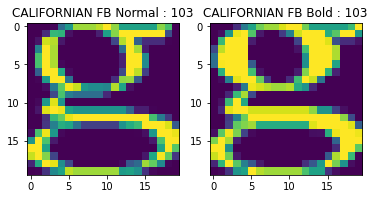

FontSelection(name='calisto', variant='CALISTO MT', style='old_style', c_label='os')


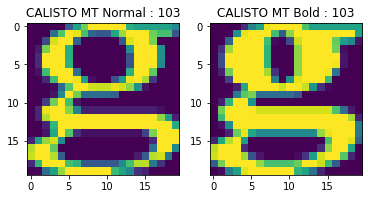

FontSelection(name='centaur', variant='CENTAUR', style='old_style', c_label='os')


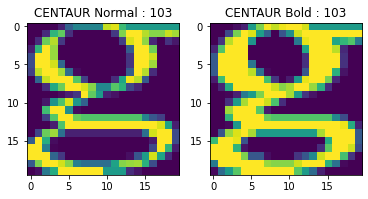

FontSelection(name='cooper', variant='COOPER BLACK', style='old_style', c_label='os')


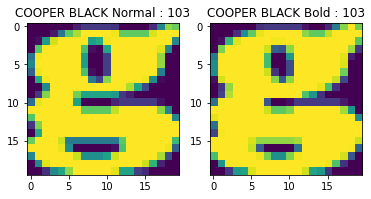

FontSelection(name='garamond', variant='GARAMOND', style='old_style', c_label='os')


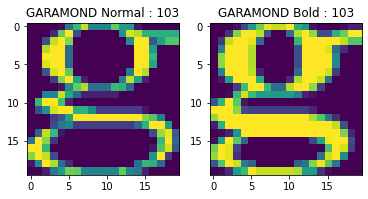

FontSelection(name='goudy', variant='GOUDY STOUT', style='old_style', c_label='os')


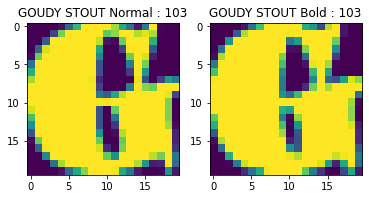

FontSelection(name='goudy', variant='GOUDY OLD STYLE', style='old_style', c_label='os')


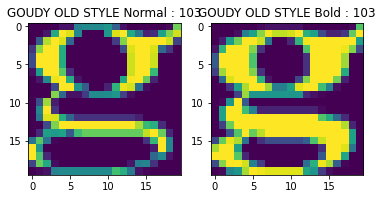

FontSelection(name='palatino', variant='PALATINO LINOTYPE', style='old_style', c_label='os')


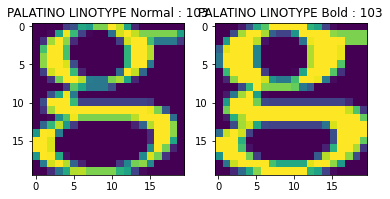

FontSelection(name='roman', variant='ROMAND', style='old_style', c_label='os')


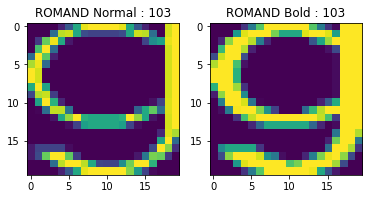

FontSelection(name='roman', variant='ROMANT', style='old_style', c_label='os')


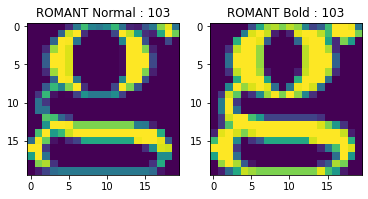

FontSelection(name='superfrench', variant='SUPERFRENCH', style='old_style', c_label='os')


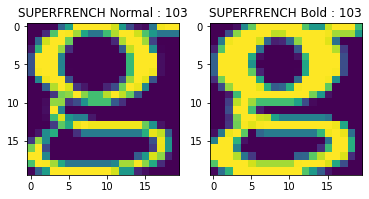

FontSelection(name='baskerville', variant='BASKERVILLE OLD FACE', style='transitional', c_label='tr')


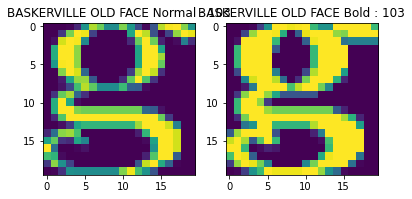

FontSelection(name='bell', variant='BELL MT', style='transitional', c_label='tr')


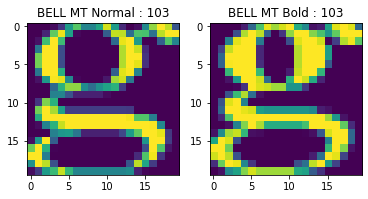

FontSelection(name='bookman', variant='BOOKMAN OLD STYLE', style='transitional', c_label='tr')


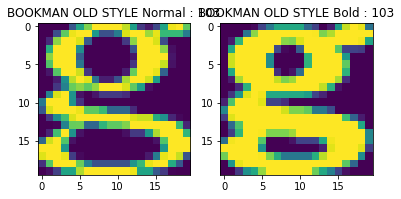

FontSelection(name='cambria', variant='CAMBRIA', style='transitional', c_label='tr')


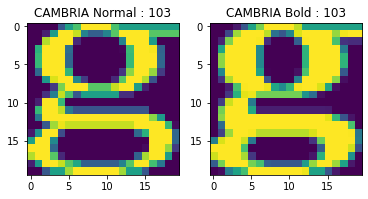

FontSelection(name='constantia', variant='CONSTANTIA', style='transitional', c_label='tr')


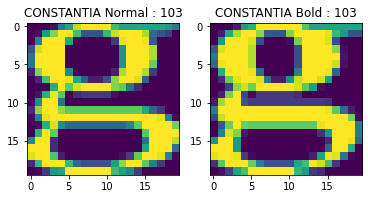

FontSelection(name='euroroman', variant='EUROROMAN', style='transitional', c_label='tr')


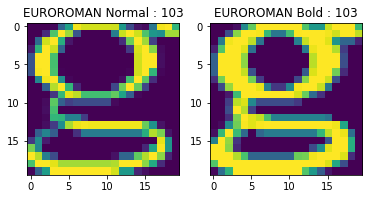

FontSelection(name='georgia', variant='GEORGIA', style='transitional', c_label='tr')


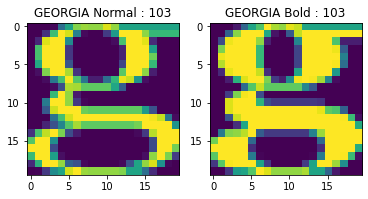

FontSelection(name='perpetua', variant='PERPETUA TITLING MT', style='transitional', c_label='tr')


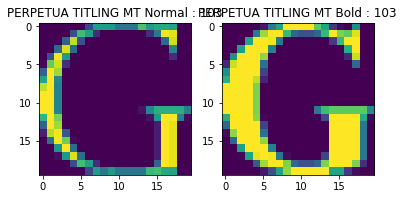

FontSelection(name='perpetua', variant='PERPETUA', style='transitional', c_label='tr')


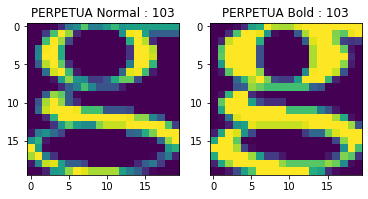

FontSelection(name='times', variant='TIMES NEW ROMAN', style='transitional', c_label='tr')


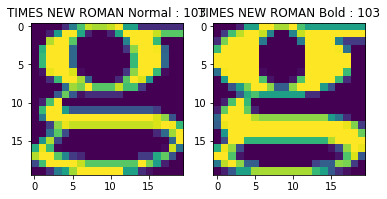

FontSelection(name='bernard', variant='BERNARD MT CONDENSED', style='modern', c_label='mo')


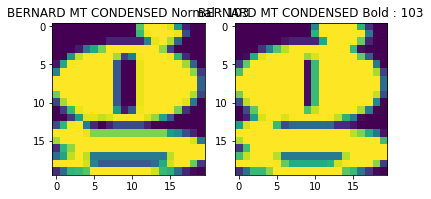

FontSelection(name='bodoni', variant='BODONI MT', style='modern', c_label='mo')


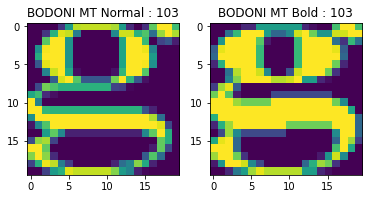

FontSelection(name='bodoni', variant='BODONI MT BLACK', style='modern', c_label='mo')


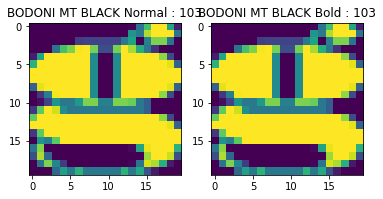

FontSelection(name='century', variant='CENTURY SCHOOLBOOK', style='modern', c_label='mo')


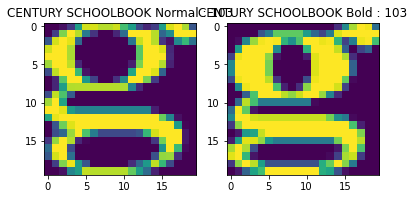

FontSelection(name='dutch801', variant='DUTCH801 XBD BT', style='modern', c_label='mo')


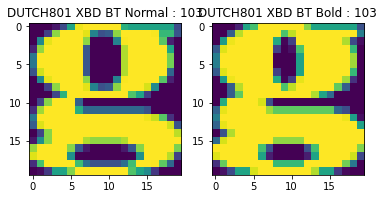

FontSelection(name='dutch801', variant='DUTCH801 RM BT', style='modern', c_label='mo')


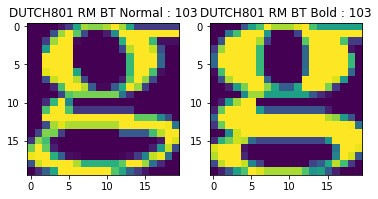

FontSelection(name='elephant', variant='ELEPHANT', style='modern', c_label='mo')


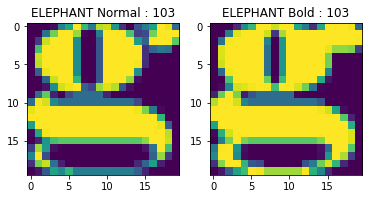

FontSelection(name='engravers', variant='ENGRAVERS MT', style='modern', c_label='mo')


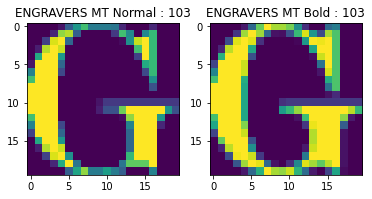

FontSelection(name='footlight', variant='FOOTLIGHT MT LIGHT', style='modern', c_label='mo')


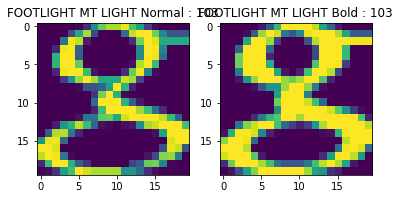

FontSelection(name='gloucester', variant='GLOUCESTER MT EXTRA CONDENSED', style='modern', c_label='mo')


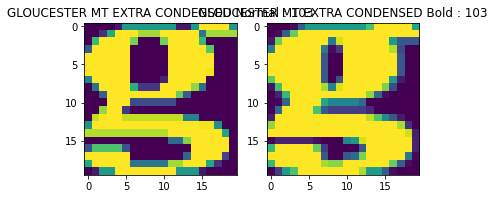

FontSelection(name='niagara', variant='NIAGARA SOLID', style='modern', c_label='mo')


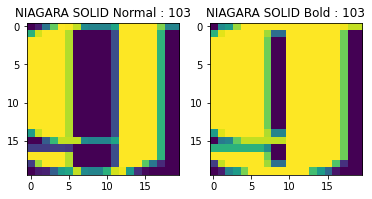

FontSelection(name='niagara', variant='NIAGARA ENGRAVED', style='modern', c_label='mo')


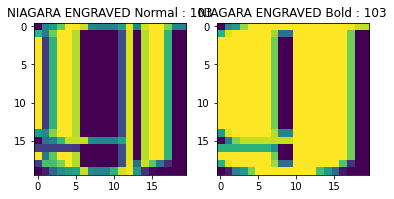

FontSelection(name='onyx', variant='ONYX', style='modern', c_label='mo')


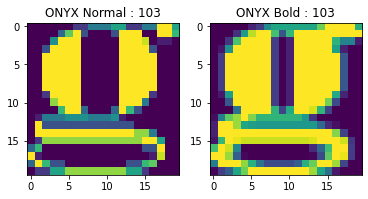

FontSelection(name='playbill', variant='PLAYBILL', style='modern', c_label='mo')


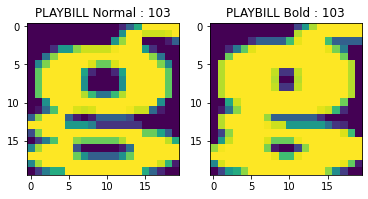

FontSelection(name='agency', variant='AGENCY FB', style='sans_serif', c_label='ss')


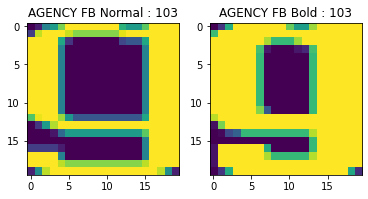

FontSelection(name='arial', variant='ARIAL', style='sans_serif', c_label='ss')


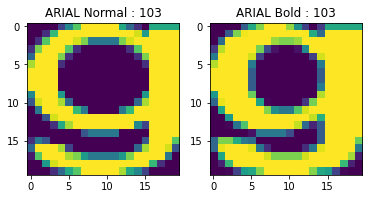

FontSelection(name='bauhaus', variant='BAUHAUS 93', style='sans_serif', c_label='ss')


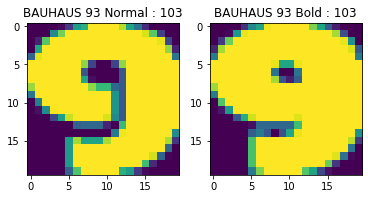

FontSelection(name='berlin', variant='BERLIN SANS FB', style='sans_serif', c_label='ss')


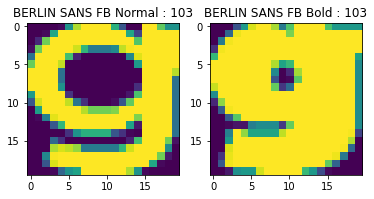

FontSelection(name='calibri', variant='CALIBRI', style='sans_serif', c_label='ss')


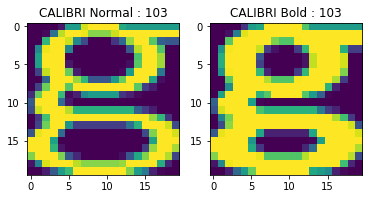

FontSelection(name='candara', variant='CANDARA', style='sans_serif', c_label='ss')


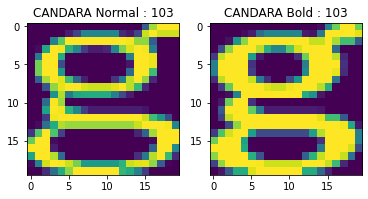

FontSelection(name='consolas', variant='CONSOLAS', style='sans_serif', c_label='ss')


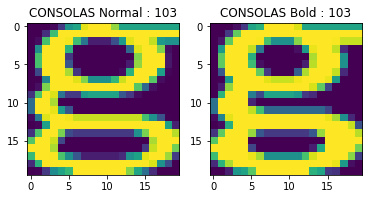

FontSelection(name='copperplate', variant='COPPERPLATE GOTHIC LIGHT', style='sans_serif', c_label='ss')


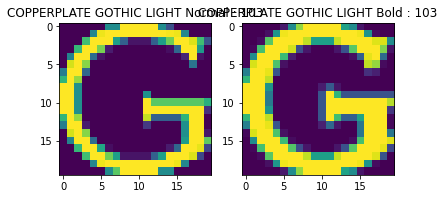

FontSelection(name='corbel', variant='CORBEL', style='sans_serif', c_label='ss')


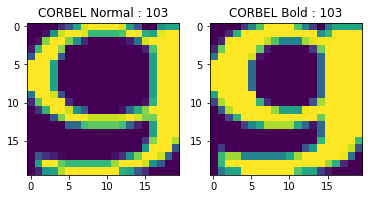

FontSelection(name='ebrima', variant='EBRIMA', style='sans_serif', c_label='ss')


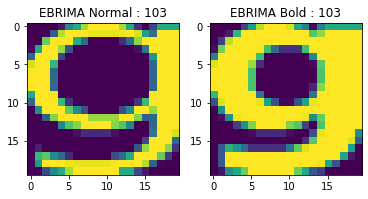

FontSelection(name='eras', variant='ERAS DEMI ITC', style='sans_serif', c_label='ss')


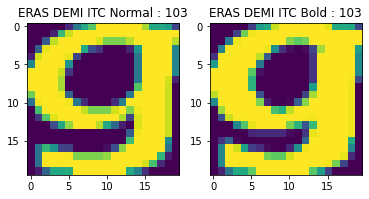

FontSelection(name='gadugi', variant='GADUGI', style='sans_serif', c_label='ss')


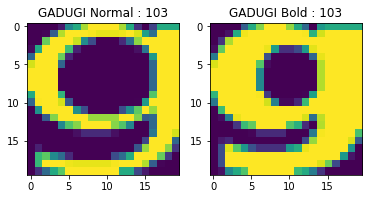

FontSelection(name='gill', variant='GILL SANS MT', style='sans_serif', c_label='ss')


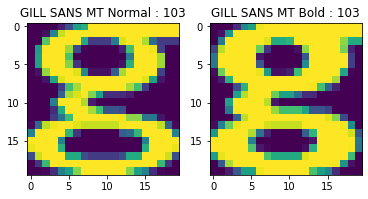

FontSelection(name='haettenschweiler', variant='HAETTENSCHWEILER', style='sans_serif', c_label='ss')


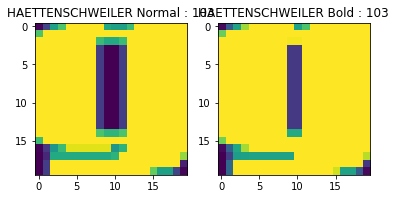

FontSelection(name='lucida', variant='LUCIDA SANS', style='sans_serif', c_label='ss')


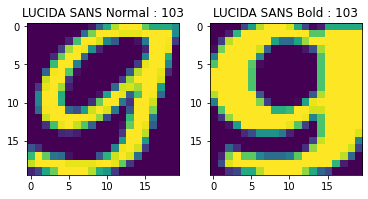

FontSelection(name='maiandra', variant='MAIANDRA GD', style='sans_serif', c_label='ss')


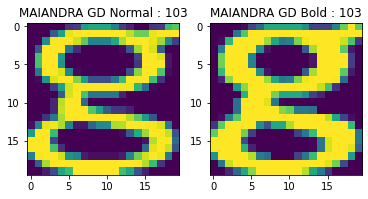

FontSelection(name='nirmala', variant='NIRMALA UI', style='sans_serif', c_label='ss')


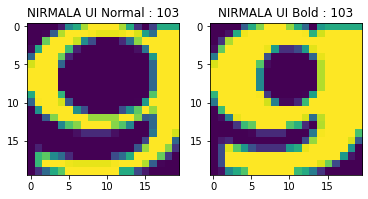

FontSelection(name='quicktype', variant='QUICKTYPE II', style='sans_serif', c_label='ss')


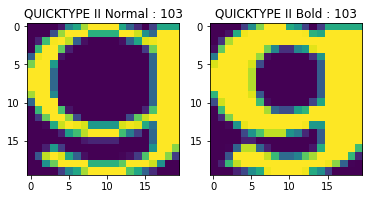

FontSelection(name='segoe', variant='SEGOE UI', style='sans_serif', c_label='ss')


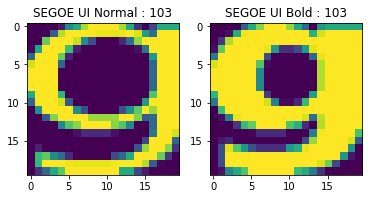

FontSelection(name='tahoma', variant='TAHOMA', style='sans_serif', c_label='ss')


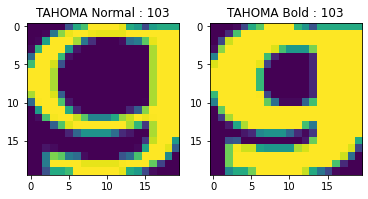

FontSelection(name='technic', variant='TECHNIC', style='sans_serif', c_label='ss')


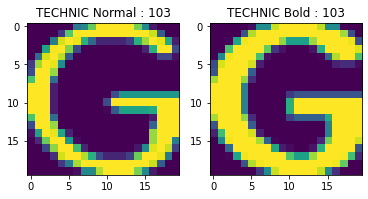

FontSelection(name='tw', variant='TW CEN MT', style='sans_serif', c_label='ss')


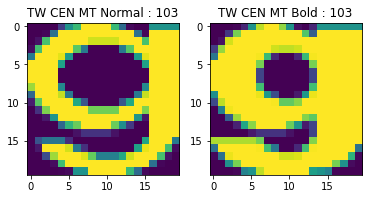

FontSelection(name='verdana', variant='VERDANA', style='sans_serif', c_label='ss')


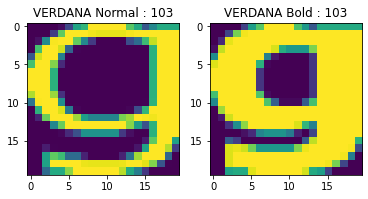

In [7]:
example_ltr = ord('g')
caption_str = ['Normal', 'Bold']

ex_rows=1
ex_cols=2
ex_fig_size = [6,12]

m1 = 'Missing Variant (1)'
m2 = 'Missing Variant (2)'

for c in CLASS_LIST:
    
    for font_tuple in FONTS_BY_STYLE_DICT[c]:
        print(f'{font_tuple}')
        tf = RAW_DATA.get(font_tuple.variant, m1)
        if tf == m1:
            print(f'{font.name} : {font.variant} {tf}')
            continue
 
        var = tf.get(font_tuple.variant, m2)
        if var == m2:
            print(f'{font.name} : {font.variant} {var}')
            continue
            
        font_df = var['df']
        
        # create figure (fig), and array of axes (ax)
        ex_fig, ex_ax = plt.subplots(nrows=ex_rows, ncols=ex_cols, figsize=ex_fig_size)
        plt.subplots_adjust(hspace=0.3)

        img_list = list()

        norm_ltr = font_df.loc[font_df.m_label == example_ltr].iloc[0]
        bold_ltr = font_df.loc[font_df.m_label == example_ltr].iloc[1]

        letters = [norm_ltr, bold_ltr]
        for ltr in letters:
            img = np.array(ltr[1:], dtype=np.uint8).reshape(20,20)
            img_list.append((f'{font_tuple.variant}',img))

        for i, axi in enumerate(ex_ax.flat):
            # i runs from 0 to (nrows*ncols-1)
            # axi is equivalent with ax[rowid][colid]
            axi.imshow(img_list[i][1])
            # get indices of row/column
            # write row/col indices as axes' title for identification
            axi.set_title(f'{img_list[i][0]} {caption_str[i%2]} : {example_ltr}')

        plt.show()

## Save Collected Data Into Single Data Frame

1. Columns: font.name, font.variant, class_label, m_label, r0c0,...,r19c10
1. Save to single CSV file for ingestion into neural networks

In [12]:
a_tf = RAW_DATA.get('GARAMOND')['GARAMOND']
a_df = a_tf['df']
a_df['font'] = 'GARAMOND'
a_df['variant'] = 'GARAMOND'
a_df['font_class'] = 'os'
a_df

,m_label,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,...,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19,font,variant,font_class
558,122,1,1,40,197,255,1,1,1,1,...,176,176,255,255,255,86,1,GARAMOND,GARAMOND,os
559,121,119,187,240,255,255,255,245,136,119,...,1,1,1,1,1,1,1,GARAMOND,GARAMOND,os
560,120,197,233,255,255,255,255,209,197,190,...,255,255,255,255,255,233,197,GARAMOND,GARAMOND,os
561,119,189,233,255,255,189,147,63,219,255,...,214,15,1,1,1,1,1,GARAMOND,GARAMOND,os
562,118,189,239,255,255,255,255,255,222,189,...,1,1,1,1,1,1,1,GARAMOND,GARAMOND,os
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,52,1,1,1,1,1,1,1,1,1,...,255,255,255,110,1,1,1,GARAMOND,GARAMOND,os
1925,51,1,1,1,1,1,7,90,140,189,...,90,24,1,1,1,1,1,GARAMOND,GARAMOND,os
1926,50,1,1,1,1,4,76,137,186,255,...,255,255,255,255,255,166,6,GARAMOND,GARAMOND,os
1927,49,1,1,1,1,1,1,1,9,97,...,255,255,255,255,255,255,255,GARAMOND,GARAMOND,os


In [23]:
o_list = list()

for c in CLASS_LIST:
    
    for font_tuple in FONTS_BY_STYLE_DICT[c]:
#         print(f'{font_tuple}')
        tf = RAW_DATA.get(font_tuple.variant, m1)
#         if tf == m1:
#             print(f'{font.name} : {font.variant} {tf}')
#             continue
 
        var = tf.get(font_tuple.variant, m2)
#         if var == m2:
#             print(f'{font.name} : {font.variant} {var}')
#             continue
            
        t_df = var['df']
        t_df['font'] = font_tuple.name
        t_df['variant'] = font_tuple.variant
        t_df['font_class'] = font_tuple.c_label
        
        o_list.append(t_df)
        
o_df = pd.DataFrame().append(o_list)
o_df.to_csv(f'{TRIMMED_PATH}/all_fonts.csv')